In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dataframe_image as dfi
import collections
from collections import Counter
from itertools import chain
import csv

#Opening bank
filename = '/home/valentina/SOFKA_CODIGO/words_bank.csv'
with open(filename, 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    text = list(csv_reader)

#Converting our words bank into pandas dataframe
df =pd.read_csv('/home/valentina/SOFKA_CODIGO/words_bank.csv', names=['Words'], header=None)


In [32]:
# Getting some information about the words

#Count consonants
def countConsonants(string):
    num_consonants = 0
    # to count the consonants
    for char in string:
        if char not in "aeiouAEIOU ":
            num_consonants += 1
    return num_consonants

#Count vocals
def countVocals(string):
    num_vocals = 0
    # to count the consonants
    for char in string:
        if char in "aeiouAEIOU ":
            num_vocals += 1
    return num_vocals


df['Length']=df['Words'].str.len()
df['Consonants'] = df['Words'].apply(countConsonants)
df['Vocals'] = df['Words'].apply(countVocals)

#Saving the first 20 words in a dataframe
df_20first= df.head(20)
dfi.export(df_20first,"df.png")

/home/valentina/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


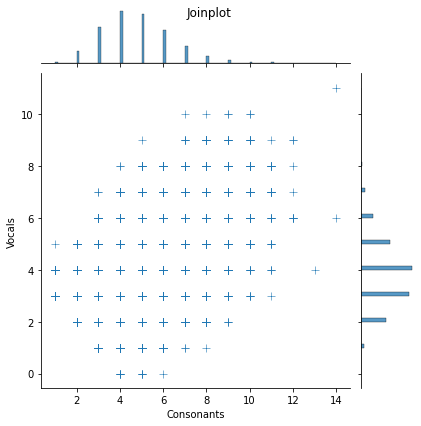

In [33]:
#Getting some statistics info
df_info= df.describe()


#Getting de mode
df_mode= df[['Length', 'Vocals', 'Consonants']].mode()

#Incluiding perc90
df_perc_90=pd.DataFrame(df.quantile(0.9)).T

#Range
df_stat_range= pd.DataFrame(df_info.loc['max'].T-df_info.loc['min'].T).rename(columns={0: 'range'}).T

df_stat_var= pd.DataFrame(df_info.loc['std']**2).rename(columns={'std': 'var'}).T

df_stat= pd.concat([df_info,df_stat_var, df_mode,df_perc_90, df_stat_range], axis=0).rename(
    index={0: 'mode',0.9: '90%'}).reindex(['count', 'mean', 'var','std', 'mode',
     'min', '25%', '50%', '75%', '90%', 'max', 'range'])
dfi.export(df_stat,"df_stat.png")

#Plots
#Joinplot
sns.jointplot(df['Consonants'], df['Vocals'], marker="+", s=50)
#sns.jointplot(df['Consonants'], df['Vocals'], kind = "reg")
plt.suptitle("Joinplot")
plt.savefig('vocals_consonants_joinplot.png')



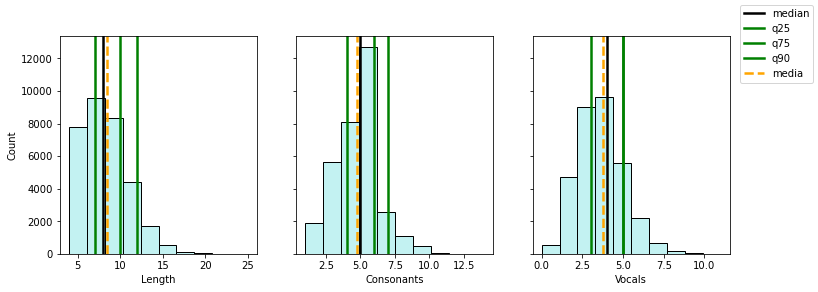

In [34]:
df_short=df[['Length', 'Consonants', 'Vocals']]
fig, ax = plt.subplots(nrows = 1, ncols =3, figsize=(12,4), sharey=True)

for pos,cols in enumerate(df_short.columns):
    sns.histplot(data=df_short, x=cols, bins=10, ax = ax[pos], color='paleturquoise')
    ax[pos].axvline(x=df[cols].median(), c='k', ls='-', lw=2.5, label = 'median')
    ax[pos].axvline(x=df[cols].quantile(0.25), c='green', ls='-', lw=2.5, label = 'q25')
    ax[pos].axvline(x=df[cols].quantile(0.75), c='green', ls='-', lw=2.5, label = 'q75')
    ax[pos].axvline(x=df[cols].quantile(0.90), c='green', ls='-', lw=2.5, label = 'q90')
    ax[pos].axvline(x=df[cols].mean(), c='orange', ls='--', lw=2.5, label = 'media')
    
    if pos == 0:
        fig.legend()
        #plt.title('hi')
        

plt.savefig('hist_words.png')
   

In [35]:
#Counting the letters
letter_counter = Counter(chain.from_iterable(df['Words']))
df_count_words =pd.DataFrame.from_dict(letter_counter, orient='index', columns=['Count']).sort_index()
df_count_words.index = df_count_words.index.astype("str") 
df_count_words =df_count_words.sort_values(by='Count', ascending=False)



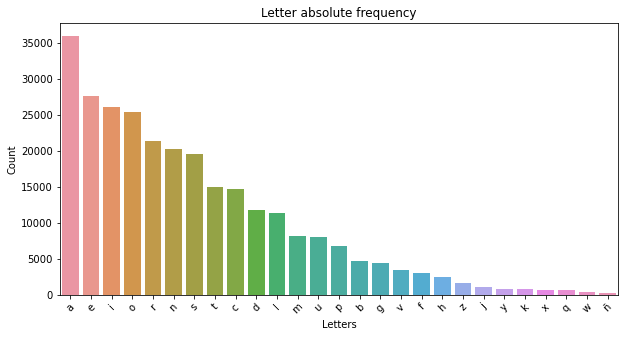

In [36]:
#Plot letters count
fig_dims = (10, 5)
plt.figure(figsize=fig_dims)
y= sns.barplot(x = df_count_words.index, y= df_count_words.Count)
_=plt.xticks(rotation=45)
_=plt.ylabel('Count')
_=plt.xlabel('Letters')
plt.title("Letter absolute frequency")
plt.savefig('absolute_frecuency_letters.png')

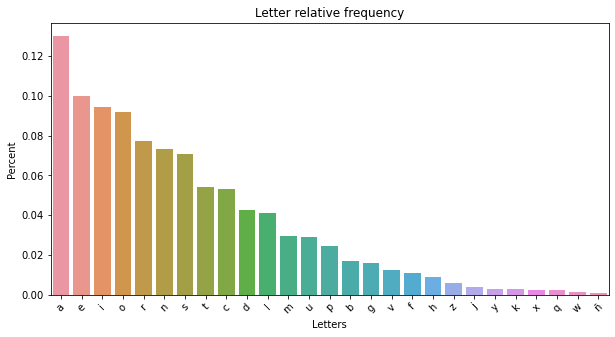

In [37]:
#Letters relative frecuency

letter_frecuency = {
    character: value / sum(letter_counter.values())
    for character, value in letter_counter.items()}

dict_frecuency_letters={k: v for k, v in sorted(letter_frecuency.items(), key=lambda item: item[1], reverse=True)}
df_frecuency_letters=pd.DataFrame.from_dict(dict_frecuency_letters, orient='index', columns=['Percent'])
fig_dims = (10, 5)
plt.figure(figsize=fig_dims)
y= sns.barplot(x = df_frecuency_letters.index, y= df_frecuency_letters.Percent)
_=plt.xticks(rotation=45)
_=plt.ylabel('Percent')
_=plt.xlabel('Letters')
plt.title("Letter relative frequency")
plt.savefig('relative_frequency_letters.png')


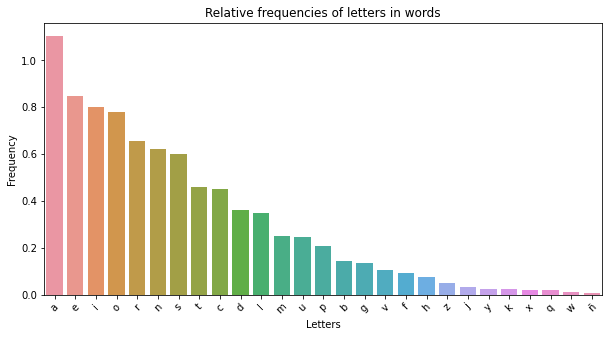

In [38]:
words_string = ''.join(df['Words'])
letter_counts = dict(Counter(words_string))
# Create frequency of letters in words dictionary
letter_mean = {k:v/len(df['Words']) for k,v in letter_counts.items()}
df_letter_mean=pd.DataFrame.from_dict(letter_mean, orient='index').sort_values(by=0, ascending=False)
plt.figure(figsize=fig_dims)
y= sns.barplot(x = df_letter_mean.index, y= df_letter_mean[0])
_=plt.xticks(rotation=45)
_=plt.ylabel('Frequency')
_=plt.xlabel('Letters')
plt.title("Relative frequencies of letters in words")
plt.savefig('relative_frequency_letters.png')



In [39]:
#Getting the letter-position dataFrame
letters=[]
position=[]
# For each word in the list of accepted words
for word in (df['Words']):
    # Convert the words to it's letter-position format
    for pos, letter in enumerate(word):
        letters.append(letter)
        position.append(pos)

df_letters_position = pd.DataFrame(list(zip(letters, position)),
               columns =['Letter', 'Position']).sort_values(by='Letter')

In [40]:
#Aggregating the data and getting some statistics info
df_letters_position_stats= df_letters_position.groupby('Letter')['Position'].describe()
df_letters_position_stats['range']= df_letters_position_stats['max']-df_letters_position_stats['min']
df_letters_position_stats['var']= df_letters_position_stats['std']**2
df_letters_position_stats= df_letters_position_stats.reindex(columns=['count', 'mean','var','std', 
'min', '25%', '50%', '75%', 'max', 'range'])
df_letters_position_stats['mode']=df_letters_position.groupby('Letter')['Position'].agg(pd.Series.mode)
#Saving the df
dfi.export(df_letters_position_stats,"df_letters_position_stats.png")
df_letters_position_stats

,count,mean,var,std,min,25%,50%,75%,max,range,mode
Letter,,,,,,,,,,,
a,35895.0,4.622427,9.525819,3.086393,0.0,2.0,5.0,7.0,22.0,22.0,1
b,4655.0,3.019979,7.030327,2.651476,0.0,1.0,2.0,5.0,16.0,16.0,0
c,14749.0,3.474744,9.005007,3.000834,0.0,0.0,3.0,6.0,16.0,16.0,0
d,11761.0,4.519854,10.566804,3.250662,0.0,2.0,5.0,7.0,20.0,20.0,0
e,27517.0,3.890976,10.065814,3.172667,0.0,1.0,3.0,6.0,18.0,18.0,1
f,3074.0,2.323682,5.874044,2.423643,0.0,0.0,2.0,4.0,16.0,16.0,0
g,4422.0,3.071009,5.647072,2.376357,0.0,2.0,3.0,5.0,15.0,15.0,2
h,2444.0,2.255728,5.951359,2.439541,0.0,0.0,1.5,4.0,14.0,14.0,0
i,26054.0,4.433484,7.602588,2.757279,0.0,2.0,4.0,6.0,20.0,20.0,3


In [41]:
# Getting the Percent of letter position
df_group_count=pd.DataFrame(df_letters_position.groupby(['Letter', 'Position']).size().rename('count')).reset_index()
#group_count_2=group_count.reset_index()
df_group_count.describe()
df_letpos_percent = df_group_count.merge(df_letters_position.groupby(['Letter']).size().rename('count_letter').reset_index(),
on = 'Letter')

df_letpos_percent['Percent']= df_letpos_percent['count']/df_letpos_percent['count_letter']
df_letpos_percent

df_letpos_percent= df_letpos_percent[['Letter', 'Position', 'Percent']]




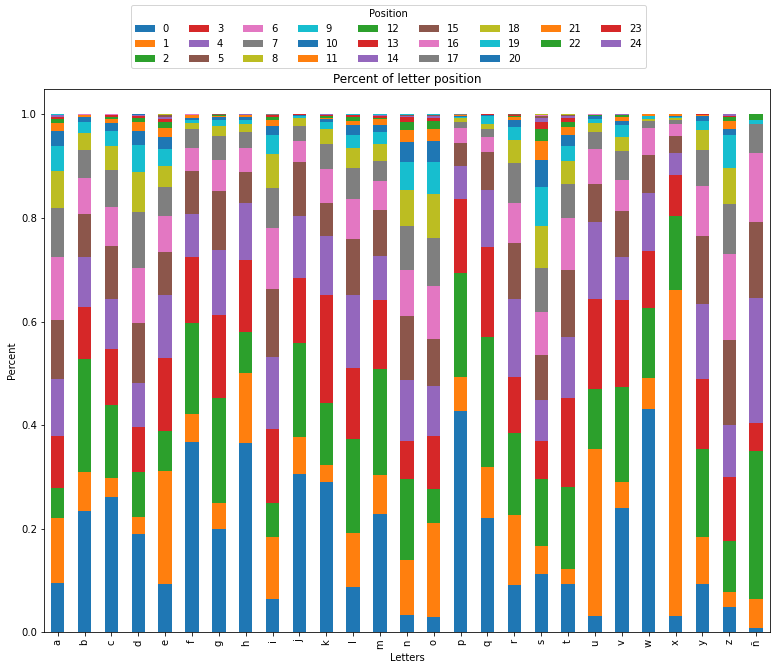

In [42]:
# Plotting the Percent of letter position
fig_dims=(13,10)
fig,ax=plt.subplots(figsize=fig_dims)
df_letpos_percent.pivot(index = 'Letter', columns = 'Position', values = 'Percent'
).plot(kind='bar', stacked=True, ax = ax, legend = False)
_=plt.ylabel('Percent')
_=plt.xlabel('Letters')
plt.title("Percent of letter position")
fig.legend(title="Position",ncol=9, loc='upper center')
plt.savefig('position_percent.png')

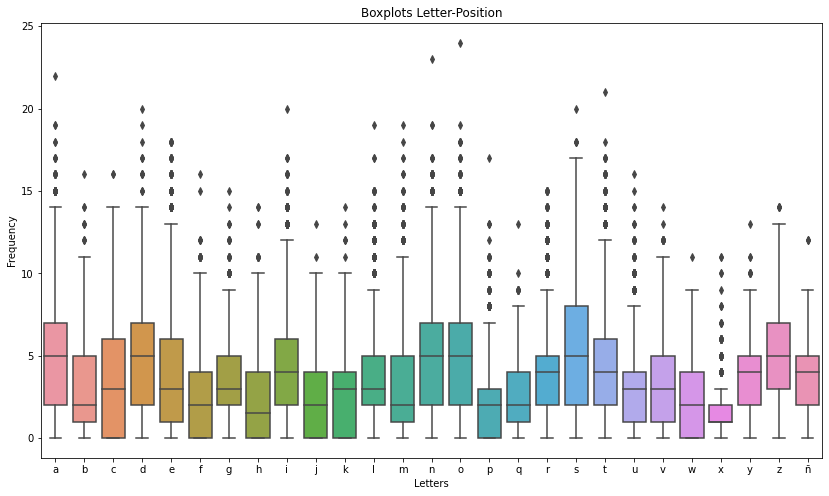

In [43]:
#Boxplots of letter position
plt.figure(figsize=(14, 8))
sns.boxplot(x="Letter", y="Position", data=df_letters_position)
_=plt.ylabel('Frequency')
_=plt.xlabel('Letters')
plt.title("Boxplots Letter-Position")
plt.savefig('blox_plot_letter_position.png')

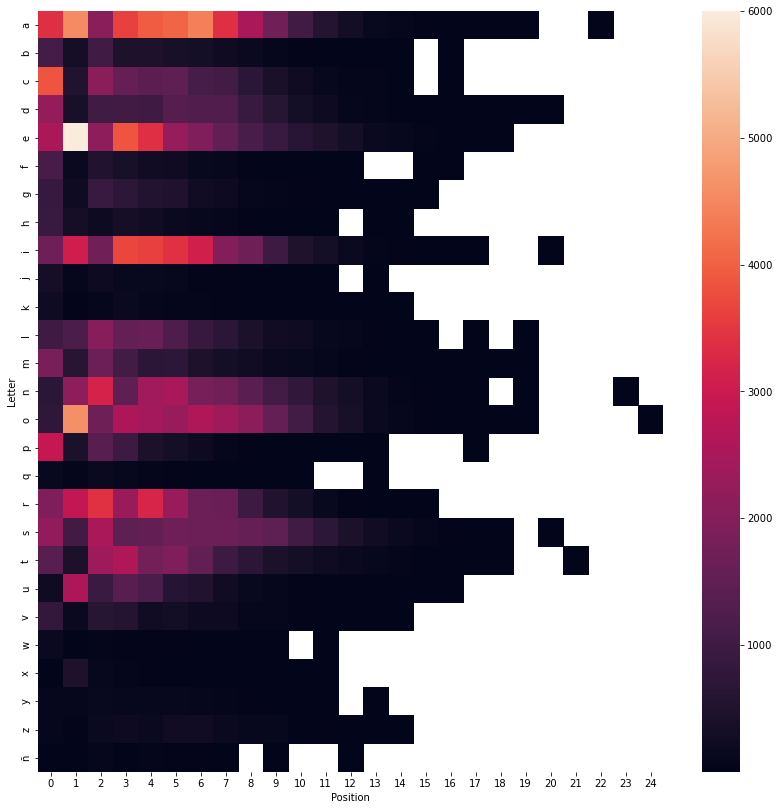

In [45]:
#Heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(df_group_count.pivot(index = 'Letter', columns = 'Position', values = 'count'))
plt.savefig('heat_map.png')
